# Problem

We need to repeatedly choose between N possible actions so as to maximize the total reward over a sequence of M choices. Each action results in a random reward drawn from an unknown distribution specific to that action. In this notebook, these are normal distributions with randomly assigned means and variances (but that can be easily changed).

# Parameter setup

In [50]:
actions = 10 # number of actions N (with normally distributed rewards)
steps = 50000 # number of choices made in 1 simulation, M
simulations = 1000 # number of times the simulation is repeated

# Simulation setup

In [51]:
# Import libraries
import random
import numpy as np

In [52]:
# Function to select action using UCB1 strategy
# 4 parameters: actions - number of actions, step - the step in the simulation,
# act_rewards - matrix with all 

def select_action(actions, step, mean_reward, stdev_reward):    
    if step < actions: # try every action once first
        action = step
    elif step < 2*actions: # try every action a second time to get a variance
        action = step - actions
    else:
        est_rewards = [] # get estimated rewards for all actions
        for action in range(actions):
            est_rewards.append(random.gauss(mean_reward[action], stdev_reward[action]))
        action = est_rewards.index(max(est_rewards))

    return action

In [53]:
# Function to run simulation once
def run_simulation(actions, steps):

    # Initialize parameters
    mean = [random.random() for i in range(actions)] # means rewards for each of the possible actions
    stdev = [random.random() for i in range(actions)] # standard deviations of rewards for each possible action
    action_rewards = [[] for i in range(actions)] # record of all rewards for each action
    actual_best = mean.index(max(mean))
    
    # Initialize the means and standard deviations for the predicted normal distributions of all actions
    # that will be used for Thompson sampling
    mean_reward = np.zeros(actions)
    stdev_reward = np.zeros(actions)
    
    print ("\n Initial best action guess: {:4d}\n".format(best))
    times_tried = np.zeros(actions) # times each action has been tried
    total_reward = 0. # total reward achieved in simulation
    max_expected_reward = mean[actual_best] * steps # expected reward if best action is always chosen (for assessing performance)
    steps_to_best = 0 # number of steps after which only one "best" action is always chosen
    
    # Run simulation
#    print ("Step".rjust(5), "Action".rjust(15), "Best action".rjust(15), "Reward".rjust(15), "\n")
    for step in range(steps):
    
        action = select_action(actions, step, mean_reward, times_tried) # select action to take in each step
        reward = random.gauss(mean[action], stdev[action]) # get reward from normal distribution for picked action
        total_reward += reward # update total reward
        action_rewards[action].append(reward)
        temp = np.asarray(action_rewards[action]) 
        if step >= 2 * actions:
            mean_reward[action] = temp.mean() # update mean reward for picked action
            stdev_reward[action] = temp.std(ddof = 1) # update standard deviation for picked action
#        print (action, mean_reward[action], stdev_reward[action])
        times_tried[action] += 1 # update number of times the action was taken        
    
#        print ("{:5d} {:15d} {:15d} {:15.8f}".format(step, action, best, reward))

    return total_reward, max_expected_reward, mean, stdev, mean_reward, stdev_reward

In [54]:
# Run simulation once
total_reward, max_expected_reward, mean, stdev, mean_reward, stdev_reward = run_simulation(actions, steps)

print ("Action".rjust(7), "Reward mean".rjust(15), "Reward stdev".rjust(15), "Estimated mean".rjust(15), "Estimated stdev".rjust(15), "\n")
for action in range(actions):
    print ("{:7d} {:15.8f} {:15.8f} {:15.8f} {:15.8f}".format(action, mean[action], stdev[action], mean_reward[action], stdev_reward[action]))

print ("\n Percentage of maximum expected reward achieved: {:15.8f}".format(total_reward/max_expected_reward*100))


 Initial best action guess:    3

 Action     Reward mean    Reward stdev  Estimated mean Estimated stdev 

      0      0.59636306      0.89119162      0.60049918      0.89374426
      1      0.68739473      0.17903850      0.68948108      0.17912181
      2      0.30132268      0.93903894      0.29913268      0.95131025
      3      0.28521710      0.49159799      0.28460427      0.48513669
      4      0.18462275      0.89138936      0.19060464      0.88975211
      5      0.04957049      0.01635067      0.04898873      0.01745598
      6      0.66362751      0.14219365      0.66182780      0.14075534
      7      0.01970294      0.79052296      0.00105444      0.74178508
      8      0.18561123      0.60922638      0.16268629      0.62904041
      9      0.24488019      0.40445051      0.24066107      0.40429010

 Percentage of maximum expected reward achieved:     64.22127793


Thompson sampling gets very good estimates for the mean and standard deviation of distributions, particualrly of those with the highest rewards. However, in this case it does not achieve great rewards (possibly, because the means for the distributions are too close and the standard deviations are too large?)

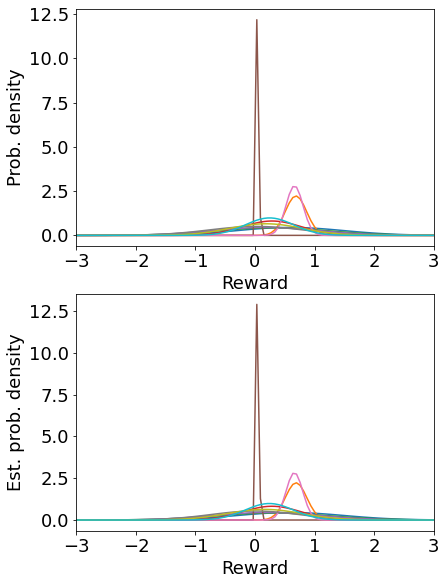

In [63]:
import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib import rc

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}
rc('font', **font)

plt.figure(1, figsize=(6.4, 9.6))

plt.subplot(211)
plt.xlabel("Reward")
plt.ylabel("Prob. density")
plt.xlim(-3,3)
x = np.linspace(-3, 3, 100)
for action in range(actions):
    plt.plot (x, stats.norm.pdf(x, mean[action], stdev[action]))
    
plt.subplot(212)
plt.xlabel("Reward")
plt.ylabel("Est. prob. density")
plt.xlim(-3,3)
x = np.linspace(-3, 3, 100)
for action in range(actions):
    plt.plot (x, stats.norm.pdf(x, mean_reward[action], stdev_reward[action]))
